In [1]:
import numpy as np, matplotlib.pyplot as plt
import math, time, progressbar
from snn.components.neuron_class import Neuron
from snn.components.synapse_class import Synapse
from snn.components.network_class import *
from snn.functions import *

In [2]:
np.random.seed(0)

Text(0, 0.5, 'psp')

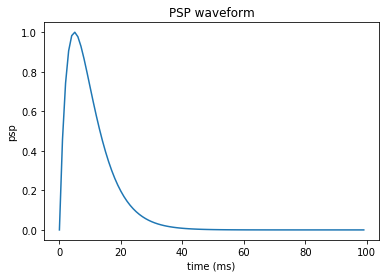

In [58]:
dt=1e-3
h = get_psp_waveform(dt, tau1=6e-3, tau2=4e-3)
plt.plot(h)
plt.title("PSP waveform")
plt.xlabel('time (ms)')
plt.ylabel('psp')

define constants

In [4]:
v_init=np.random.uniform(0, 1, size=(2,1))
T = 1000
V_0 = 1.5
v_ext = V_0*np.ones((2, T)) #same frequency of oscillation
adj_mat = np.array([[1, 1], [1, 1]])

In [5]:
w_val = np.linspace(-3, 3, 20)

In [26]:
w_val

array([-3.        , -2.68421053, -2.36842105, -2.05263158, -1.73684211,
       -1.42105263, -1.10526316, -0.78947368, -0.47368421, -0.15789474,
        0.15789474,  0.47368421,  0.78947368,  1.10526316,  1.42105263,
        1.73684211,  2.05263158,  2.36842105,  2.68421053,  3.        ])

In [6]:
t_s_all = np.zeros((20,20))
delphi_all = np.zeros((20,20))
w_converge = np.ones((20,20))

In [7]:
widgets=[progressbar.Bar('#', '[', ']'), ' ', progressbar.Percentage()]
bar = progressbar.ProgressBar(maxval=len(w_val)**2, widgets=widgets).start()
tic = time.time()
for i in range(20):
    for j in range(20):
        bar.update(len(w_val)*i + j+1)
        w_self = w_val[i]
        w_cross = w_val[j]

        net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

        for ti in range(T):
            net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
        
        try:
            f, phi = osc_state(probe['spike'], dt)
        except TypeError:
            w_converge[i,j] = 0
        t_s = settling_time(f[0,:], f[1,:], dt)
        if t_s==-1:
            w_converge[i,j] = 0
        
print(f"total time for {20*20} iterations: {time.time()-tic}s")

total time for 400 iterations: 33.07664966583252s


Text(0.5, 1.0, 'Existence of settling phase')

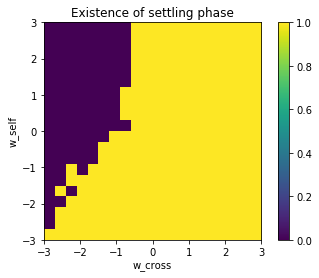

In [32]:
plt.imshow(w_converge, origin='lower', extent=[w_val[0], w_val[-1], w_val[0], w_val[-1]])
# plt.xticks(np.round(w_val, 2))
# plt.yticks(np.round(w_val, 2))
plt.colorbar()
plt.xlabel('w_cross')
plt.ylabel('w_self')
plt.title('Existence of settling phase')

In [24]:
w_val[::4]

array([-3.        , -1.73684211, -0.47368421,  0.78947368,  2.05263158])

In [33]:
w_val[np.argwhere(w_converge==0)]

array([[-2.68421053, -3.        ],
       [-2.36842105, -3.        ],
       [-2.05263158, -3.        ],
       [-2.05263158, -2.68421053],
       [-1.73684211, -3.        ],
       [-1.73684211, -2.36842105],
       [-1.42105263, -3.        ],
       [-1.42105263, -2.68421053],
       [-1.10526316, -3.        ],
       [-1.10526316, -2.68421053],
       [-1.10526316, -2.05263158],
       [-0.78947368, -3.        ],
       [-0.78947368, -2.68421053],
       [-0.78947368, -2.36842105],
       [-0.78947368, -2.05263158],
       [-0.78947368, -1.73684211],
       [-0.47368421, -3.        ],
       [-0.47368421, -2.68421053],
       [-0.47368421, -2.36842105],
       [-0.47368421, -2.05263158],
       [-0.47368421, -1.73684211],
       [-0.15789474, -3.        ],
       [-0.15789474, -2.68421053],
       [-0.15789474, -2.36842105],
       [-0.15789474, -2.05263158],
       [-0.15789474, -1.73684211],
       [-0.15789474, -1.42105263],
       [ 0.15789474, -3.        ],
       [ 0.15789474,

In [34]:
t_s_all = np.zeros((20,20))
delphi_all = np.zeros((20,20))
w_converge = np.ones((20,20))
w_val_self = np.linspace(-3, 3, 20)
w_val_cross = np.linspace(0, 3, 20)

In [35]:
widgets=[progressbar.Bar('#', '[', ']'), ' ', progressbar.Percentage()]
bar = progressbar.ProgressBar(maxval=len(w_val)**2, widgets=widgets).start()
tic = time.time()
for i in range(20):
    for j in range(20):
        bar.update(len(w_val)*i + j+1)
        w_self = w_val_self[i]
        w_cross = w_val_cross[j]

        net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

        for ti in range(T):
            net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
        try:
            f, phi = osc_state(probe['spike'], dt)
        except TypeError:
            print(f"no spikes for w_self={w_self}, w_cross={w_cross} (i={i}, j={j})")
            t_s_all[i,j] = -1
            delphi_all[i,j] = -1
#             break
        if np.abs(f[0,-1]-f[1,-1])<1e-3:
            t_s = settling_time(f[0,:], f[1,:], dt)
            t_s_all[i,j] = t_s
            delphi_all[i,j] = min((phi[0,-1]-phi[1,-1])%360, 360-(phi[0,-1]-phi[1,-1])%360)
        else:
            print(f"no settling for w_self={w_self}, w_cross={w_cross} (i={i}, j={j})")
            t_s_all[i,j] = -1
            delphi_all[i,j] = -1
print(f"total time for {20*20} iterations: {time.time()-tic}s")

total time for 400 iterations: 35.58735370635986s


Text(0.5, 1.0, 'Settling time vs w_cross for different w_self')

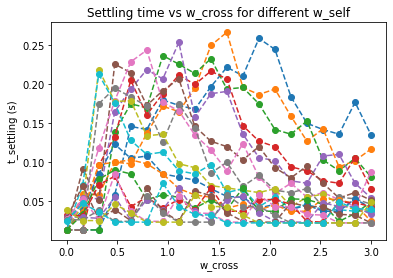

In [38]:
for i in range(20):
    plt.plot(w_val_cross, t_s_all[i,:], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_cross')
plt.ylabel('t_settling (s)')
plt.title('Settling time vs w_cross for different w_self')

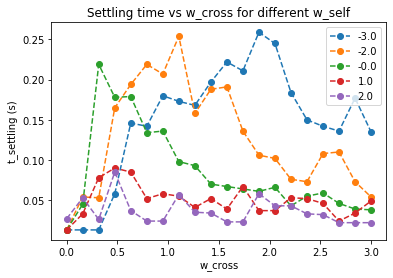

In [48]:
for i in range(5):
    plt.plot(w_val_cross, t_s_all[4*i,:], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_cross')
plt.ylabel('t_settling (s)')
plt.title('Settling time vs w_cross for different w_self')
plt.legend([str(np.round(w_val_self[4*i])) for i in range(5)])

Text(0.5, 1.0, 'Settling time vs w_self for different w_cross')

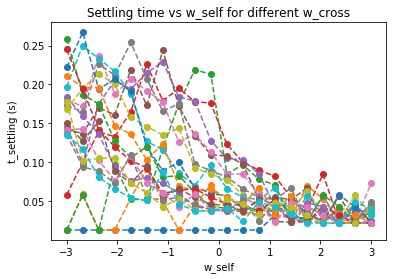

In [40]:
for i in range(20):
    plt.plot(w_val_self, t_s_all[:,i], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_self')
plt.ylabel('t_settling (s)')
plt.title('Settling time vs w_self for different w_cross')

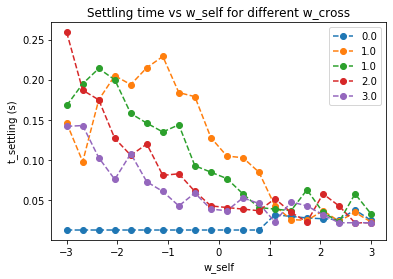

In [49]:
for i in range(5):
    plt.plot(w_val_self, t_s_all[:,4*i], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_self')
plt.ylabel('t_settling (s)')
plt.title('Settling time vs w_self for different w_cross')
plt.legend([str(np.round(w_val_cross[4*i])) for i in range(5)])

Text(0.5, 1.0, 'Settling phase vs w_cross for different w_self')

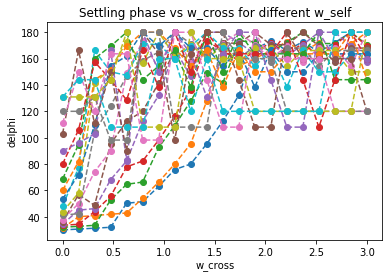

In [50]:
for i in range(20):
    plt.plot(w_val_cross, delphi_all[i,:], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_cross')
plt.ylabel('delphi')
plt.title('Settling phase vs w_cross for different w_self')

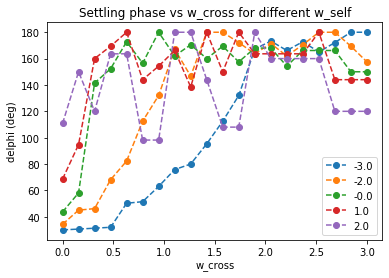

In [52]:
for i in range(5):
    plt.plot(w_val_cross, delphi_all[4*i,:], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_cross')
plt.ylabel('delphi (deg)')
plt.title('Settling phase vs w_cross for different w_self')
plt.legend([str(np.round(w_val_self[4*i])) for i in range(5)])

Text(0.5, 1.0, 'Settling phase vs w_self for different w_cross')

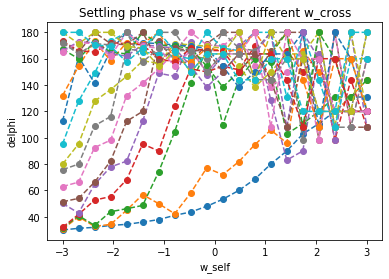

In [53]:
for i in range(20):
    plt.plot(w_val_self, delphi_all[:,i], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_self')
plt.ylabel('delphi')
plt.title('Settling phase vs w_self for different w_cross')

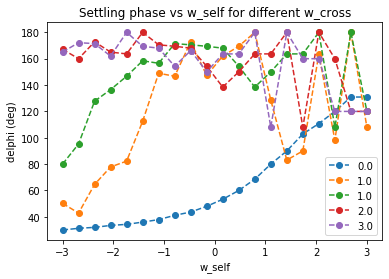

In [54]:
for i in range(5):
    plt.plot(w_val_self, delphi_all[:,4*i], 'o--')
#     plt.ylim(-0.2, 1)
plt.xlabel('w_self')
plt.ylabel('delphi (deg)')
plt.title('Settling phase vs w_self for different w_cross')
plt.legend([str(np.round(w_val_cross[4*i])) for i in range(5)])

Text(0.5, 1.0, 'w_cross=-2, w_self=1')

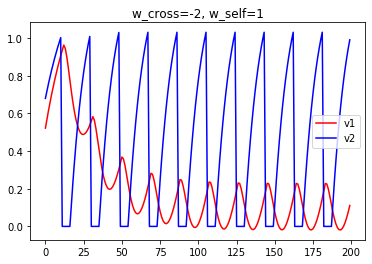

In [57]:
w_cross = -2
w_self = 1
net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

for ti in range(T):
    net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
plt.plot(probe['v'][0,:200], 'r')
plt.plot(probe['v'][1,:200], 'b')
plt.legend(['v1', 'v2'])
plt.title("w_cross=-2, w_self=1")

Text(0.5, 1.0, 'w_cross=-2, w_self=1')

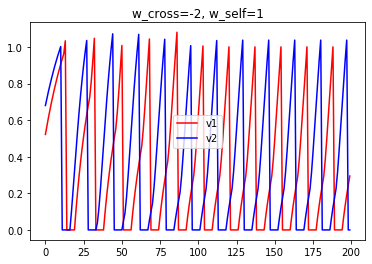

In [59]:
w_cross = 2
w_self = -1
net, probe = create_network(2, w_self, w_cross, adj_mat, h, v_init, T)

for ti in range(T):
    net.update_state(dt, v_ext[:,ti].reshape((-1,1)), probe, ti)
plt.plot(probe['v'][0,:200], 'r')
plt.plot(probe['v'][1,:200], 'b')
plt.legend(['v1', 'v2'])
plt.title("w_cross=-2, w_self=1")